# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

**Import Dependancy**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## **Import the data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import csv file and put the data in data variable name
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/regression capstone data/Copy of SeoulBikeData.csv', encoding = 'unicode_escape')

In [ ]:
# To see fist five rows
data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
# Check last five rows
data.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

In [ ]:
# Check random five rows
data.sample(5)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
6523  29/08/2018                 24    19             23.5           97   
7697  17/10/2018               1896    17             16.9           34   
2730  24/03/2018                736    18              9.0           76   
29    02/12/2017                 79     5             -4.0           79   
2744  25/03/2018                225     8              5.0           79   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
6523               0.3               323                       22.9   
7697               2.5              2000                        0.9   
2730               3.0               288                        4.9   
29                 1.5              1202                       -7.1   
2744               1.1               203                        1.6   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
6523                     0.00           6.5            0.0  Summer   
7697                     0.74           0.0            0.0  Autumn   
2730                     0.45           0.0            0.0  Spring   
29                       0.00           0.0            0.0  Winter   
2744                     0.23           0.0            0.0  Spring   

         Holiday Functioning Day  
6523  No Holiday             Yes  
7697  No Holiday             Yes  
2730  No Holiday             Yes  
29    No Holiday             Yes  
2744  No Holiday             Yes

In [ ]:
# Check data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## **Exploratory Data Analysis (EDA)**

In [ ]:
# Check the shape of the dataset
data.shape

(8760, 14)

In [ ]:
# Check the null values in the dataset
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

* So according to data we do **not** have any **null value**. 
* We have **four object** columns **six float** columns and **four int** columns.
* **Rented Bike Count** column is **dependent column** and **rest columns** are **independant** columns.

### **Relationship b/w Seasons and Rented Bike Count**

In [ ]:
# Check the count of the session
data['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
# Check the data session and bike count
session_and_bike = data.groupby("Seasons")["Rented Bike Count"].sum().reset_index()
session_and_bike

Seasons  Rented Bike Count
0  Autumn            1790002
1  Spring            1611909
2  Summer            2283234
3  Winter             487169

Text(0.5, 0, 'Seasons name')

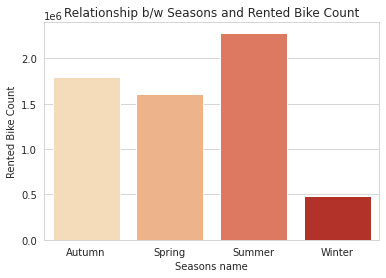

In [ ]:
# try to show these details in bar ploit
visual=sns.barplot(x='Seasons',y='Rented Bike Count',data=session_and_bike,palette="OrRd")
visual.set_title('Relationship b/w Seasons and Rented Bike Count')
visual.set_ylabel('Rented Bike Count')
visual.set_xlabel('Seasons name')

**Session making huge impact on bike rented where in summer there was very high count and in winter very low**

* According to graph we can say in "**Summer**" there are **2283234** bike rented.

* According to graph we can say in "**Autumn**" there are **1790002** bike rented.

* According to graph we can say in "**Spring**" there are **1611909** bike rented.

* According to graph we can say in "**Winter**" there are **487169** bike rented.


#### **Relationship b/w Holiday Seasons and Rented Bike Count**

In [ ]:
# Checking the data is there is any relationship b/w Holiday and bike count
bike_and_Holiday = data.groupby('Holiday')['Rented Bike Count'].sum().reset_index()
bike_and_Holiday

Holiday  Rented Bike Count
0     Holiday             215895
1  No Holiday            5956419

Text(0.5, 0, 'Holiday')

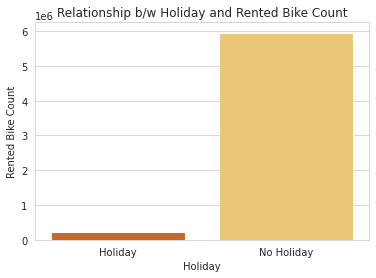

In [ ]:
# try to show these details in bar ploit
visual=sns.barplot(x='Holiday',y='Rented Bike Count',data=bike_and_Holiday,palette="YlOrBr_r")
visual.set_title('Relationship b/w Holiday and Rented Bike Count')
visual.set_ylabel('Rented Bike Count')
visual.set_xlabel('Holiday')

In [ ]:
# check bike count using holiday and session column
holiday_session_bike_count = data.groupby(['Holiday','Seasons'])['Rented Bike Count'].sum().unstack()
holiday_session_bike_count

Seasons      Autumn   Spring   Summer  Winter
Holiday                                      
Holiday       91018    45742    49063   30072
No Holiday  1698984  1566167  2234171  457097

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

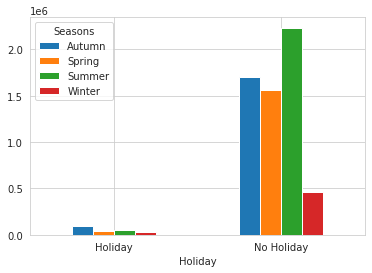

In [ ]:
holiday_session_bike_count.plot(kind='bar')
plt.xticks(rotation ='horizontal')

**In Holiday peoples are like to book the bike in Autumn session**

* According to the graph we can say in the **Non Holiday** time there are **5956419**  bikes rented count 
* In **Holiday** only **215895** counts.

* Again we can see **session** is impacting on **Holiday**. 
* Normally we know there are high bookings of bikes in **Summer**.  
* But in holiday time **Autumn** there was very **high bike rented**

#### **Relationship b/w seasons humidity and bike count**

In [ ]:
# Relationship b/w seasons humidity and bike count
rel_session_hum_bike_count = data.groupby('Seasons') \
                            .agg(Humidity_min = ('Humidity(%)', 'min'), \
                                 Humidity_max = ('Humidity(%)', 'max')).round(2).reset_index()
# print 
rel_session_hum_bike_count

Seasons  Humidity_min  Humidity_max
0  Autumn            13            97
1  Spring             0            98
2  Summer            21            98
3  Winter            14            97

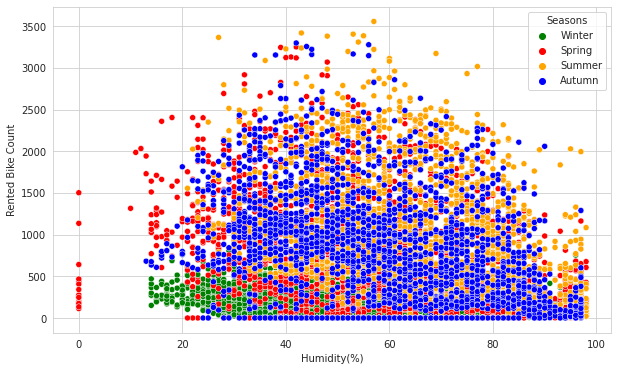

In [ ]:
#scatter plot with Humidity, Rented Bike Count for diffrent Seasons
plt.figure(figsize=(10,6))
Humidity_vs_Rented_Bike_Seasons=sns.scatterplot(x='Humidity(%)',y='Rented Bike Count',hue='Seasons',palette=['green','red','orange','blue'],legend='full',data=data)
Humidity_vs_Rented_Bike_Seasons

* According to bar plot **Humidity** is **not making** huge impact on **Rented Bike Count**.

* We found there some rowes that have **Humidity** as **0** so it is not possible so we need to check this.

#### **Temperature, Rented Bike Count for diffrent Seasons**

In [ ]:
# Relationship b/w seasons humidity and bike count
rel_session_Temperature_bike_count = data.groupby('Seasons') \
                            .agg(Temperature_min = ('Temperature(°C)', 'min'), \
                                 Temperature_max = ('Temperature(°C)', 'max')).round(2).reset_index()
# print 
rel_session_Temperature_bike_count

Seasons  Temperature_min  Temperature_max
0  Autumn             -3.0             30.5
1  Spring             -6.6             29.4
2  Summer             16.3             39.4
3  Winter            -17.8             10.3

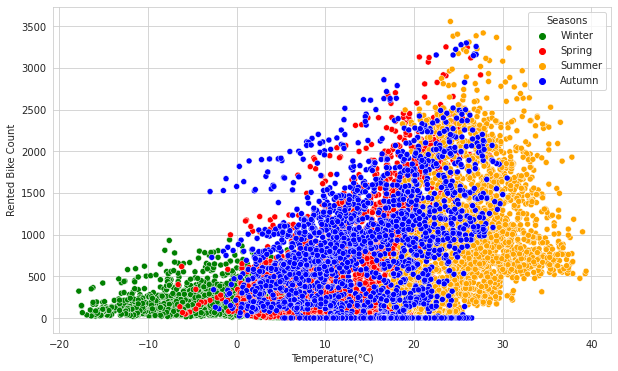

In [ ]:
#scatter plot with Temperature, Rented Bike Count for diffrent Seasons
plt.figure(figsize=(10,6))
Temperature_vs_Rented_Bike_Seasons=sns.scatterplot(x='Temperature(°C)',y='Rented Bike Count',hue='Seasons',palette=['green','red','orange','blue'],legend='full',data=data)
Temperature_vs_Rented_Bike_Seasons

* According to scattor plot **Rented Bike Count** is very low in **less** then -10 **Temperature(°C)**

* In **Winter** session Temperature goes min **-17.8°C**

* This type of condation comes in **winter session** so we suggest to the company in the winter session you should check Temperature(°C) for the next day so you can plan for net day

* less then -10 Temperature(°C) impacting on **Rented Bike Count**

#### **Hour, Rented Bike Count for diffrent Seasons**

In [ ]:
# Checking the data is there is any relationship b/w Holiday and bike count
bike_and_Hour = data.groupby('Hour')['Rented Bike Count'].sum().reset_index()
bike_and_Hour

Hour  Rented Bike Count
0      0             197633
1      1             155557
2      2             110095
3      3              74216
4      4              48396
5      5              50765
6      6             104961
7      7             221192
8      8             370731
9      9             235784
10    10             192655
11    11             219311
12    12             255296
13    13             267635
14    14             276971
15    15             302653
16    16             339677
17    17             415556
18    18             548568
19    19             436229
20    20             390172
21    21             376479
22    22             336821
23    23             244961

Text(0.5, 0, 'Hour')

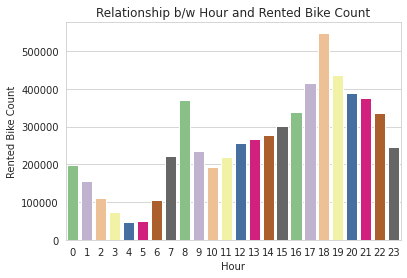

In [ ]:
# try to show these details in bar ploit
visual=sns.barplot(x='Hour',y='Rented Bike Count',data=bike_and_Hour,palette="Accent")
visual.set_title('Relationship b/w Hour and Rented Bike Count')
visual.set_ylabel('Rented Bike Count')
visual.set_xlabel('Hour')

* According to the graph we can see at **8am** there are **good** amount of booking.

* At **6pm** there are **very high** bookings.

* We suggest to the company please give **high prefrence** to **8pm**

* Also we can see there are **very less** bookings b/w **3pm** - **6pm**

#### **Wind speed**

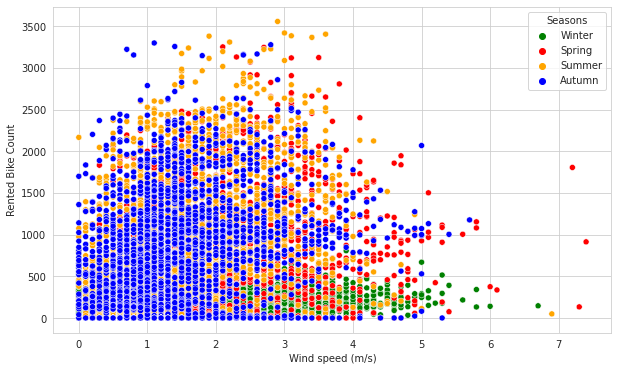

In [ ]:
#scatter plot with Temperature, Rented Bike Count for diffrent Seasons
plt.figure(figsize=(10,6))
Wind_vs_Rented_Bike_Count=sns.scatterplot(x='Wind speed (m/s)',y='Rented Bike Count',hue='Seasons',palette=['green','red','orange','blue'],legend='full',data=data)
Wind_vs_Rented_Bike_Count

* We can see there are **not much** bike ranted count after **Wind speed** **5(m/s)**

* According to the graph in **Spring** session Wind speed goes till **almost 8(m/s)**.
* So we can say this type of condation comes one or two times in a year.

#### **Visibility**

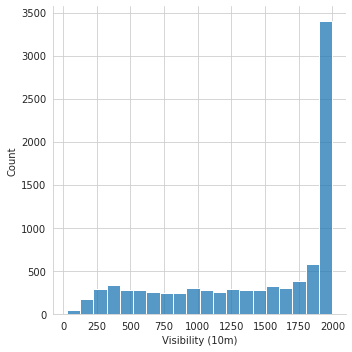

In [ ]:
# Understanding the data using distribution plot
sns.displot(data, x="Visibility (10m)")

* According to the distribution plot we can see there are very **high values** of **2000(10m)** Visibility.

#### **Rainfall**

In [ ]:
data['Rainfall(mm)'].unique()

array([ 0. ,  0.5,  1. ,  2.5,  0.1,  0.2,  0.3,  0.7,  1.6,  0.4,  1.1,
        6.4,  9.5,  3.5,  0.9,  3.3,  1.4,  1.5,  3.7,  4.5,  9. ,  2. ,
        8. , 17. ,  7. ,  3. ,  1.9,  0.8,  4. ,  6. ,  5. ,  5.5,  2.4,
       35. , 19. , 13.5, 10. , 12.5, 11.5,  5.4, 10.5,  6.5, 16. , 14.5,
        4.9, 21.5, 12. , 18.5,  7.5, 24. ,  8.5,  7.3,  1.3, 15.5, 29.5,
       21. , 13. ,  1.2, 18. ,  9.1,  1.8])

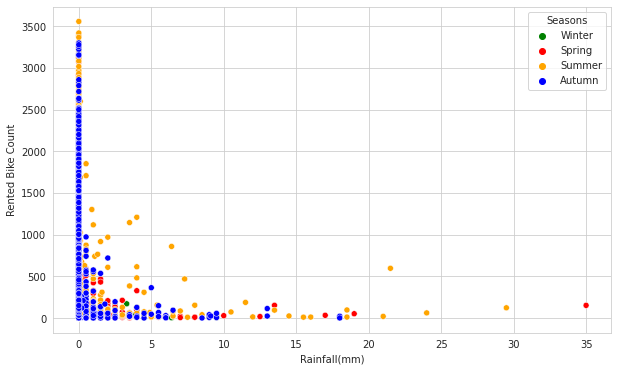

In [ ]:
#scatter plot with Rainfall, Rented Bike Count for diffrent Seasons
plt.figure(figsize=(10,6))
Rainfall_vs_Rented_Bike_Count=sns.scatterplot(x='Rainfall(mm)',y='Rented Bike Count',hue='Seasons',palette=['green','red','orange','blue'],legend='full',data=data)
Rainfall_vs_Rented_Bike_Count

* According to scatter plot we can say there are very less **Rented bike count** on greater then **5(mm)** **Rainfall**.
* Also we can see there are very less possivality of **Rainfall** more then 5(mm) in the **Winter** session.

#### **Snowfall (cm)**

In [ ]:
data.head(1)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes

In [ ]:
# les check the data for snowfall in seassions
rel_session_Snowfall_bike_count = data.groupby('Seasons') \
                            .agg(Temperature_min = ('Snowfall (cm)', 'min'), \
                                 Temperature_max = ('Snowfall (cm)', 'max'), Rented_Bike_Count = ('Rented Bike Count', 'sum')).round(2).reset_index()
# print 
rel_session_Snowfall_bike_count

Seasons  Temperature_min  Temperature_max  Rented_Bike_Count
0  Autumn              0.0              8.8            1790002
1  Spring              0.0              0.0            1611909
2  Summer              0.0              0.0            2283234
3  Winter              0.0              5.1             487169

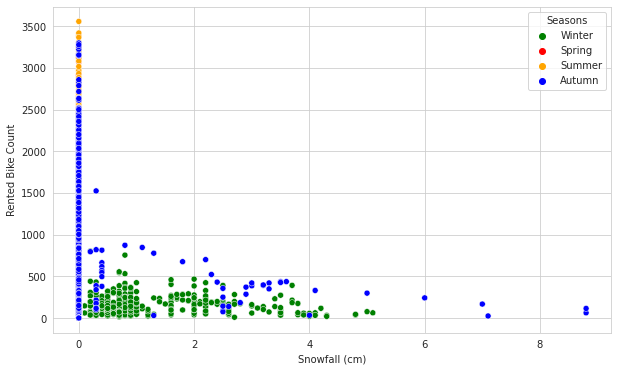

In [ ]:
#scatter plot with Snowfall, Rented Bike Count for diffrent Seasons
plt.figure(figsize=(10,6))
Snowfall_vs_Rented_Bike_Count=sns.scatterplot(x='Snowfall (cm)',y='Rented Bike Count',hue='Seasons',palette=['green','red','orange','blue'],legend='full',data=data)
Snowfall_vs_Rented_Bike_Count

* According to privous scattor plot we can see there are only **two** sessions **Winter,  Autumn**when usually **Snowfall** happens.
* Also we can see **Snowfall** directlly **impacting** on **Rented Bike Count**.
* And there is **no** Snowfall in **Summer** and **Spring**.

#### **Functioning Day**

In [ ]:
# Check the data using function day columns
functioning_day_rented_bike = data.groupby('Functioning Day')['Rented Bike Count'].sum().reset_index()
functioning_day_rented_bike

Functioning Day  Rented Bike Count
0              No                  0
1             Yes            6172314

In [ ]:
# Check how many columns where Rented Bike Count is 0
(data['Rented Bike Count']==0).sum()

295

* So we can see there is **no Rented Bike** Count when it is **No** Functioning day.

* We have 295 rows when it is No Functioning day.

#### **Date**

In [ ]:
# Check taype of date column
data['Date'].dtypes

dtype('O')

In [ ]:
# code for changing format of date from object to datetime
data['Date'] = pd.to_datetime(data['Date'], format= '%d/%m/%Y')

# we can make new column using date column
# We are going to create new feature name Date_month_no
data['Date_month_no'] = data['Date'].dt.month

In [ ]:
# Check the info of data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [ ]:
# lest's Check the values of new column.
data['Date_month_no'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
# let's check the data using mounth column
month_rented_bike_count = data.groupby('Date_month_no')['Rented Bike Count'].sum().reset_index()
month_rented_bike_count

Date_month_no  Rented Bike Count
0               1             150006
1               2             151833
2               3             380594
3               4             524227
4               5             707088
5               6             896887
6               7             734460
7               8             651887
8               9             673612
9              10             650675
10             11             465715
11             12             185330

Text(0.5, 0, 'month')

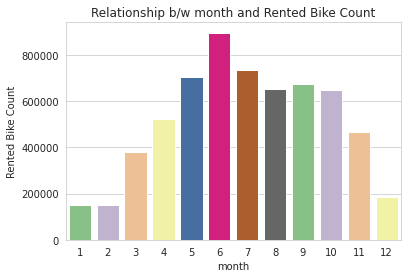

In [ ]:
# try to show these details in bar ploit
visual=sns.barplot(x='Date_month_no',y='Rented Bike Count',data=month_rented_bike_count,palette="Accent")
visual.set_title('Relationship b/w month and Rented Bike Count')
visual.set_ylabel('Rented Bike Count')
visual.set_xlabel('month')

* According to bar plot we can say that **Rented Bike Count** is very high in **june** month.

#### **Rented Bike Count**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


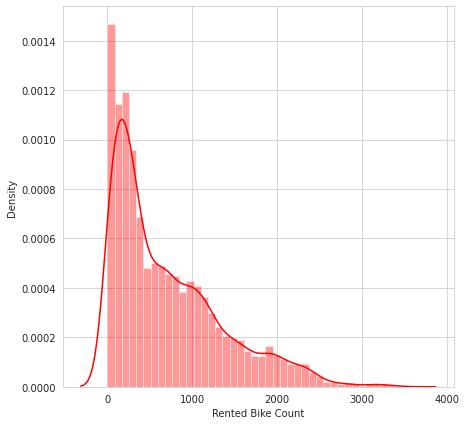

In [ ]:
# 'price' is the Dependent varibe
plt.figure(figsize = (7,7))
sns.distplot(data['Rented Bike Count'],color='r')

## EDA Conclusion

* Session are making huge impact on **Rented Bike Count** where in **summer** **(2283234)** there was very high count and in **Winter** **(487169)** very low

* We know there are **high** **Rented Bike Count**  in **Summer** but In **Holiday** peoples are like to book the bike in **Autumn** session more.So we can say Autumn session is best for Holiday.

* We found there some rowes that have **Humidity** as **0** so it is not possible so we need to check this.

* Less then **-10** **Temperature**(°C) making huge impacting on **Rented Bike Count**

* We suggest to the company please give **high prefrence** to **8pm**. Because in this time **Rented Bike Count** are very high.

* We can say there are **not much** bike ranted count after **Wind speed** **5(m/s)**

* We can say there are very less **Rented bike count** on greater then **5(mm)** **Rainfall**.

* Also we can see **Snowfall** directlly **impacting** on **Rented Bike Count**.

* According to bar plot we can say that **Rented Bike Count** is very high in **june** month.

## **Feature Engineering**

In [ ]:
# put all int features in num_features columns
num_features = data.describe().columns
num_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Date_month_no'],
      dtype='object')

### **Histogram plot**

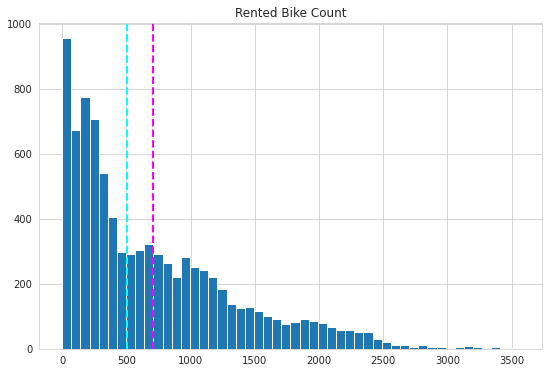

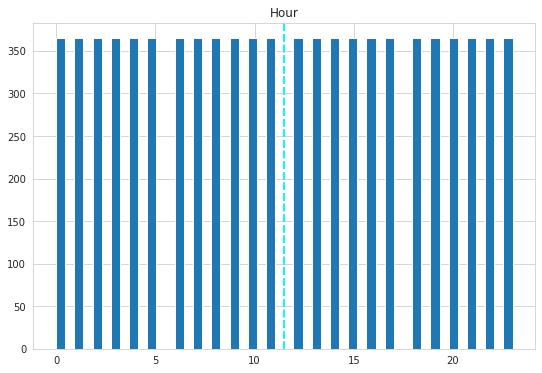

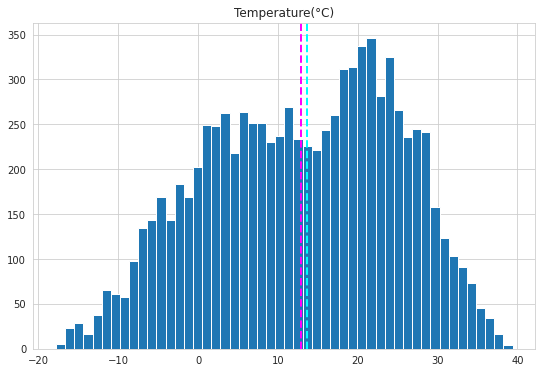

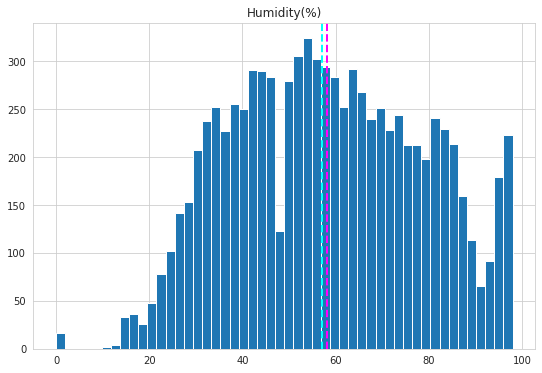

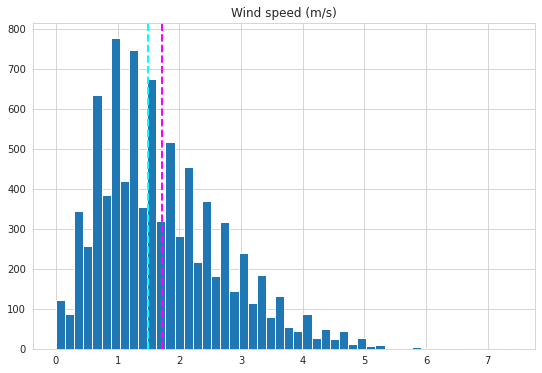

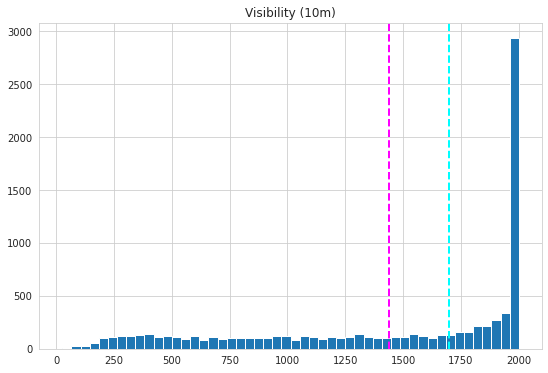

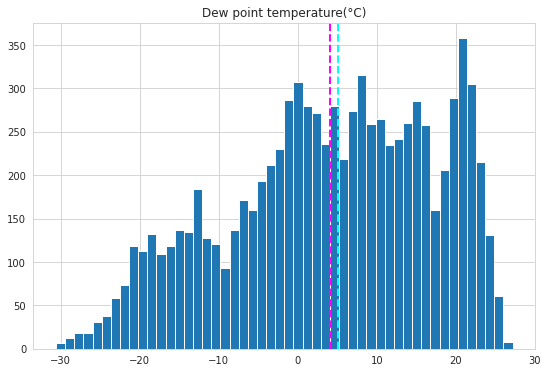

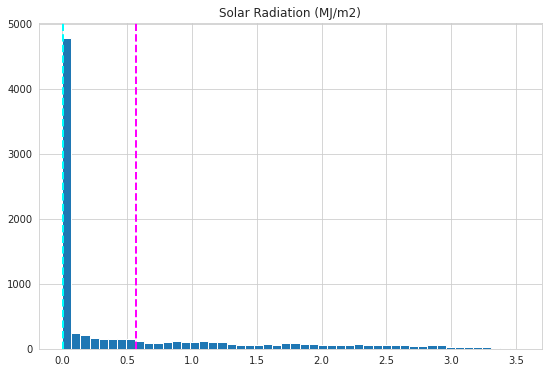

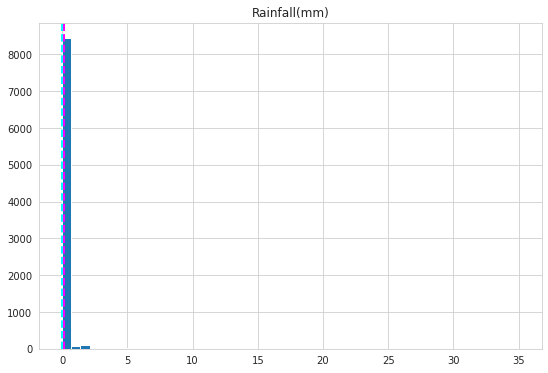

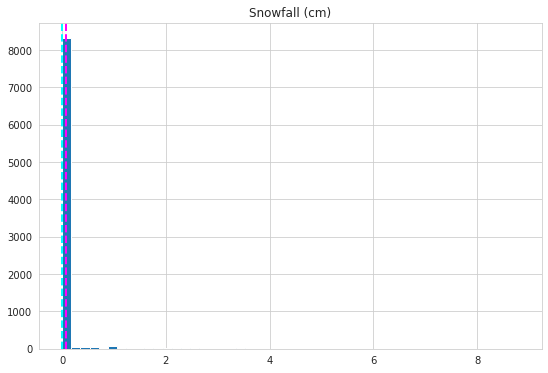

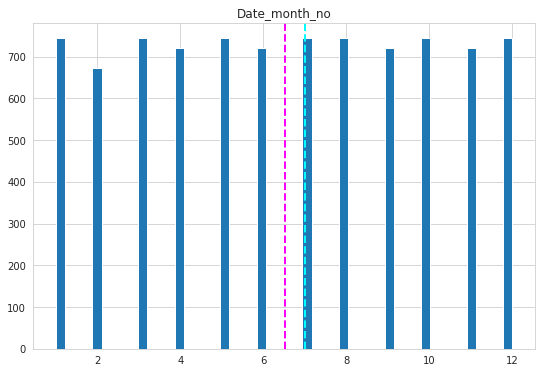

In [ ]:
#plot a bar plot for each numerical feature count

for col in num_features:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature = data[col]
  feature.hist(bins = 50, ax=ax)
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed',linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed',linewidth=2)
  ax.set_title(col)
plt.show()

### **Correlation & scatter  plot 'Rented Bike Count'**

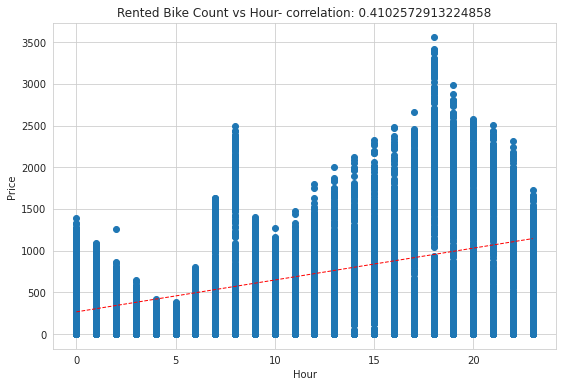

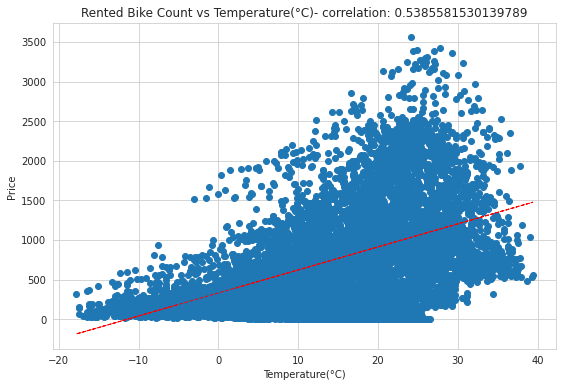

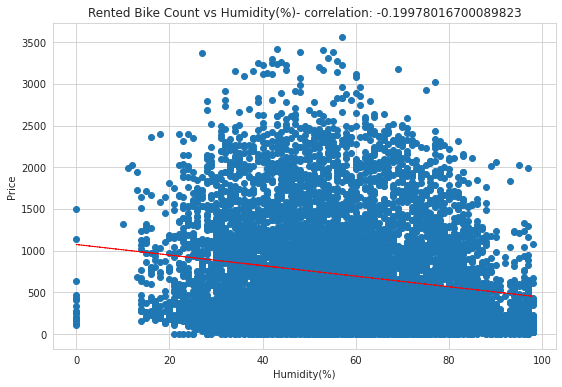

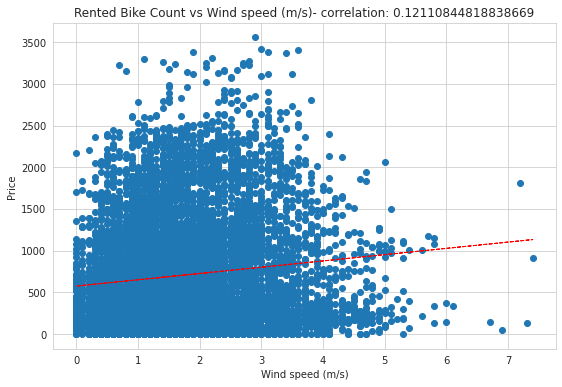

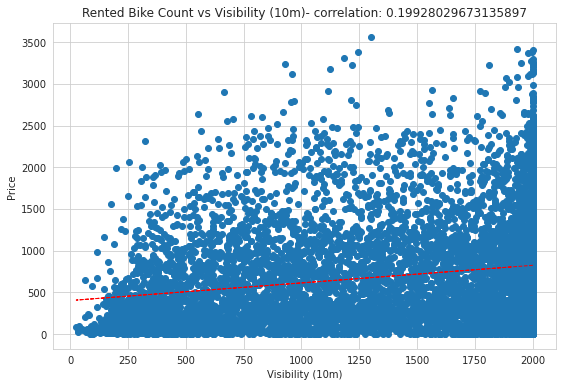

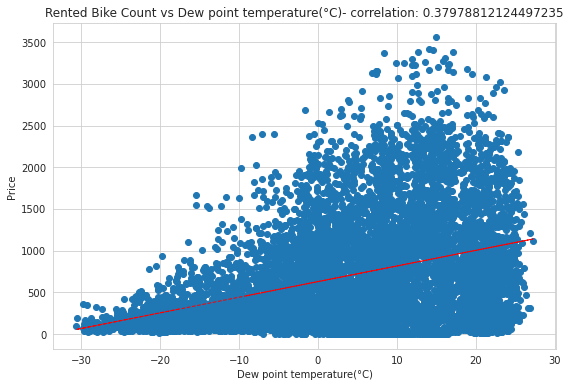

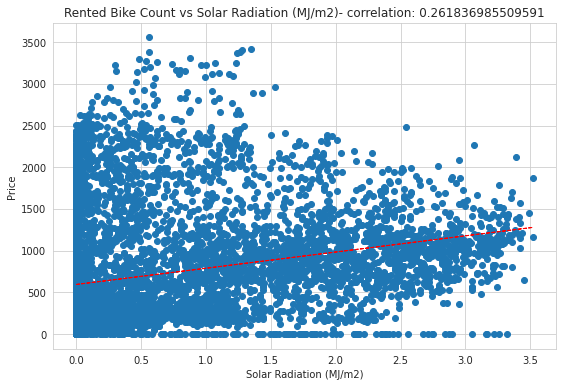

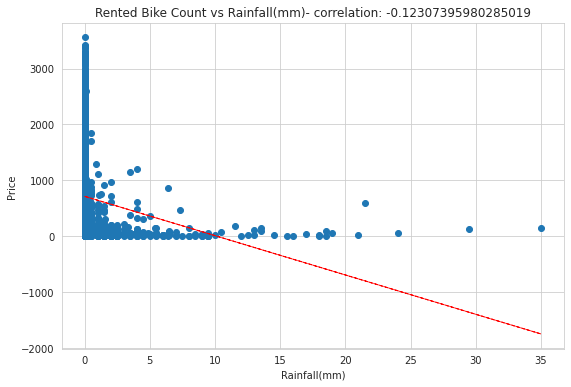

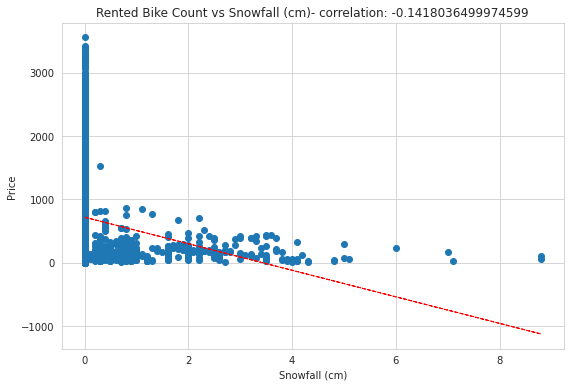

In [ ]:
# Correlation & scatter plot 'Rented Bike Count'
for col in num_features[1:-1]:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature =(data[col])
  label = data['Rented Bike Count']
  correlation = feature.corr(label)
  plt.scatter(x=feature, y=label)
  plt.xlabel(col)
  plt.ylabel('Price')
  ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
  z = np.polyfit(data[col], data['Rented Bike Count'], 1)
  y_hat = np.poly1d(z)(data[col])

  plt.plot(data[col], y_hat, "r--", lw=1)


plt.show()

### **Pair plot implemented for dataset**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


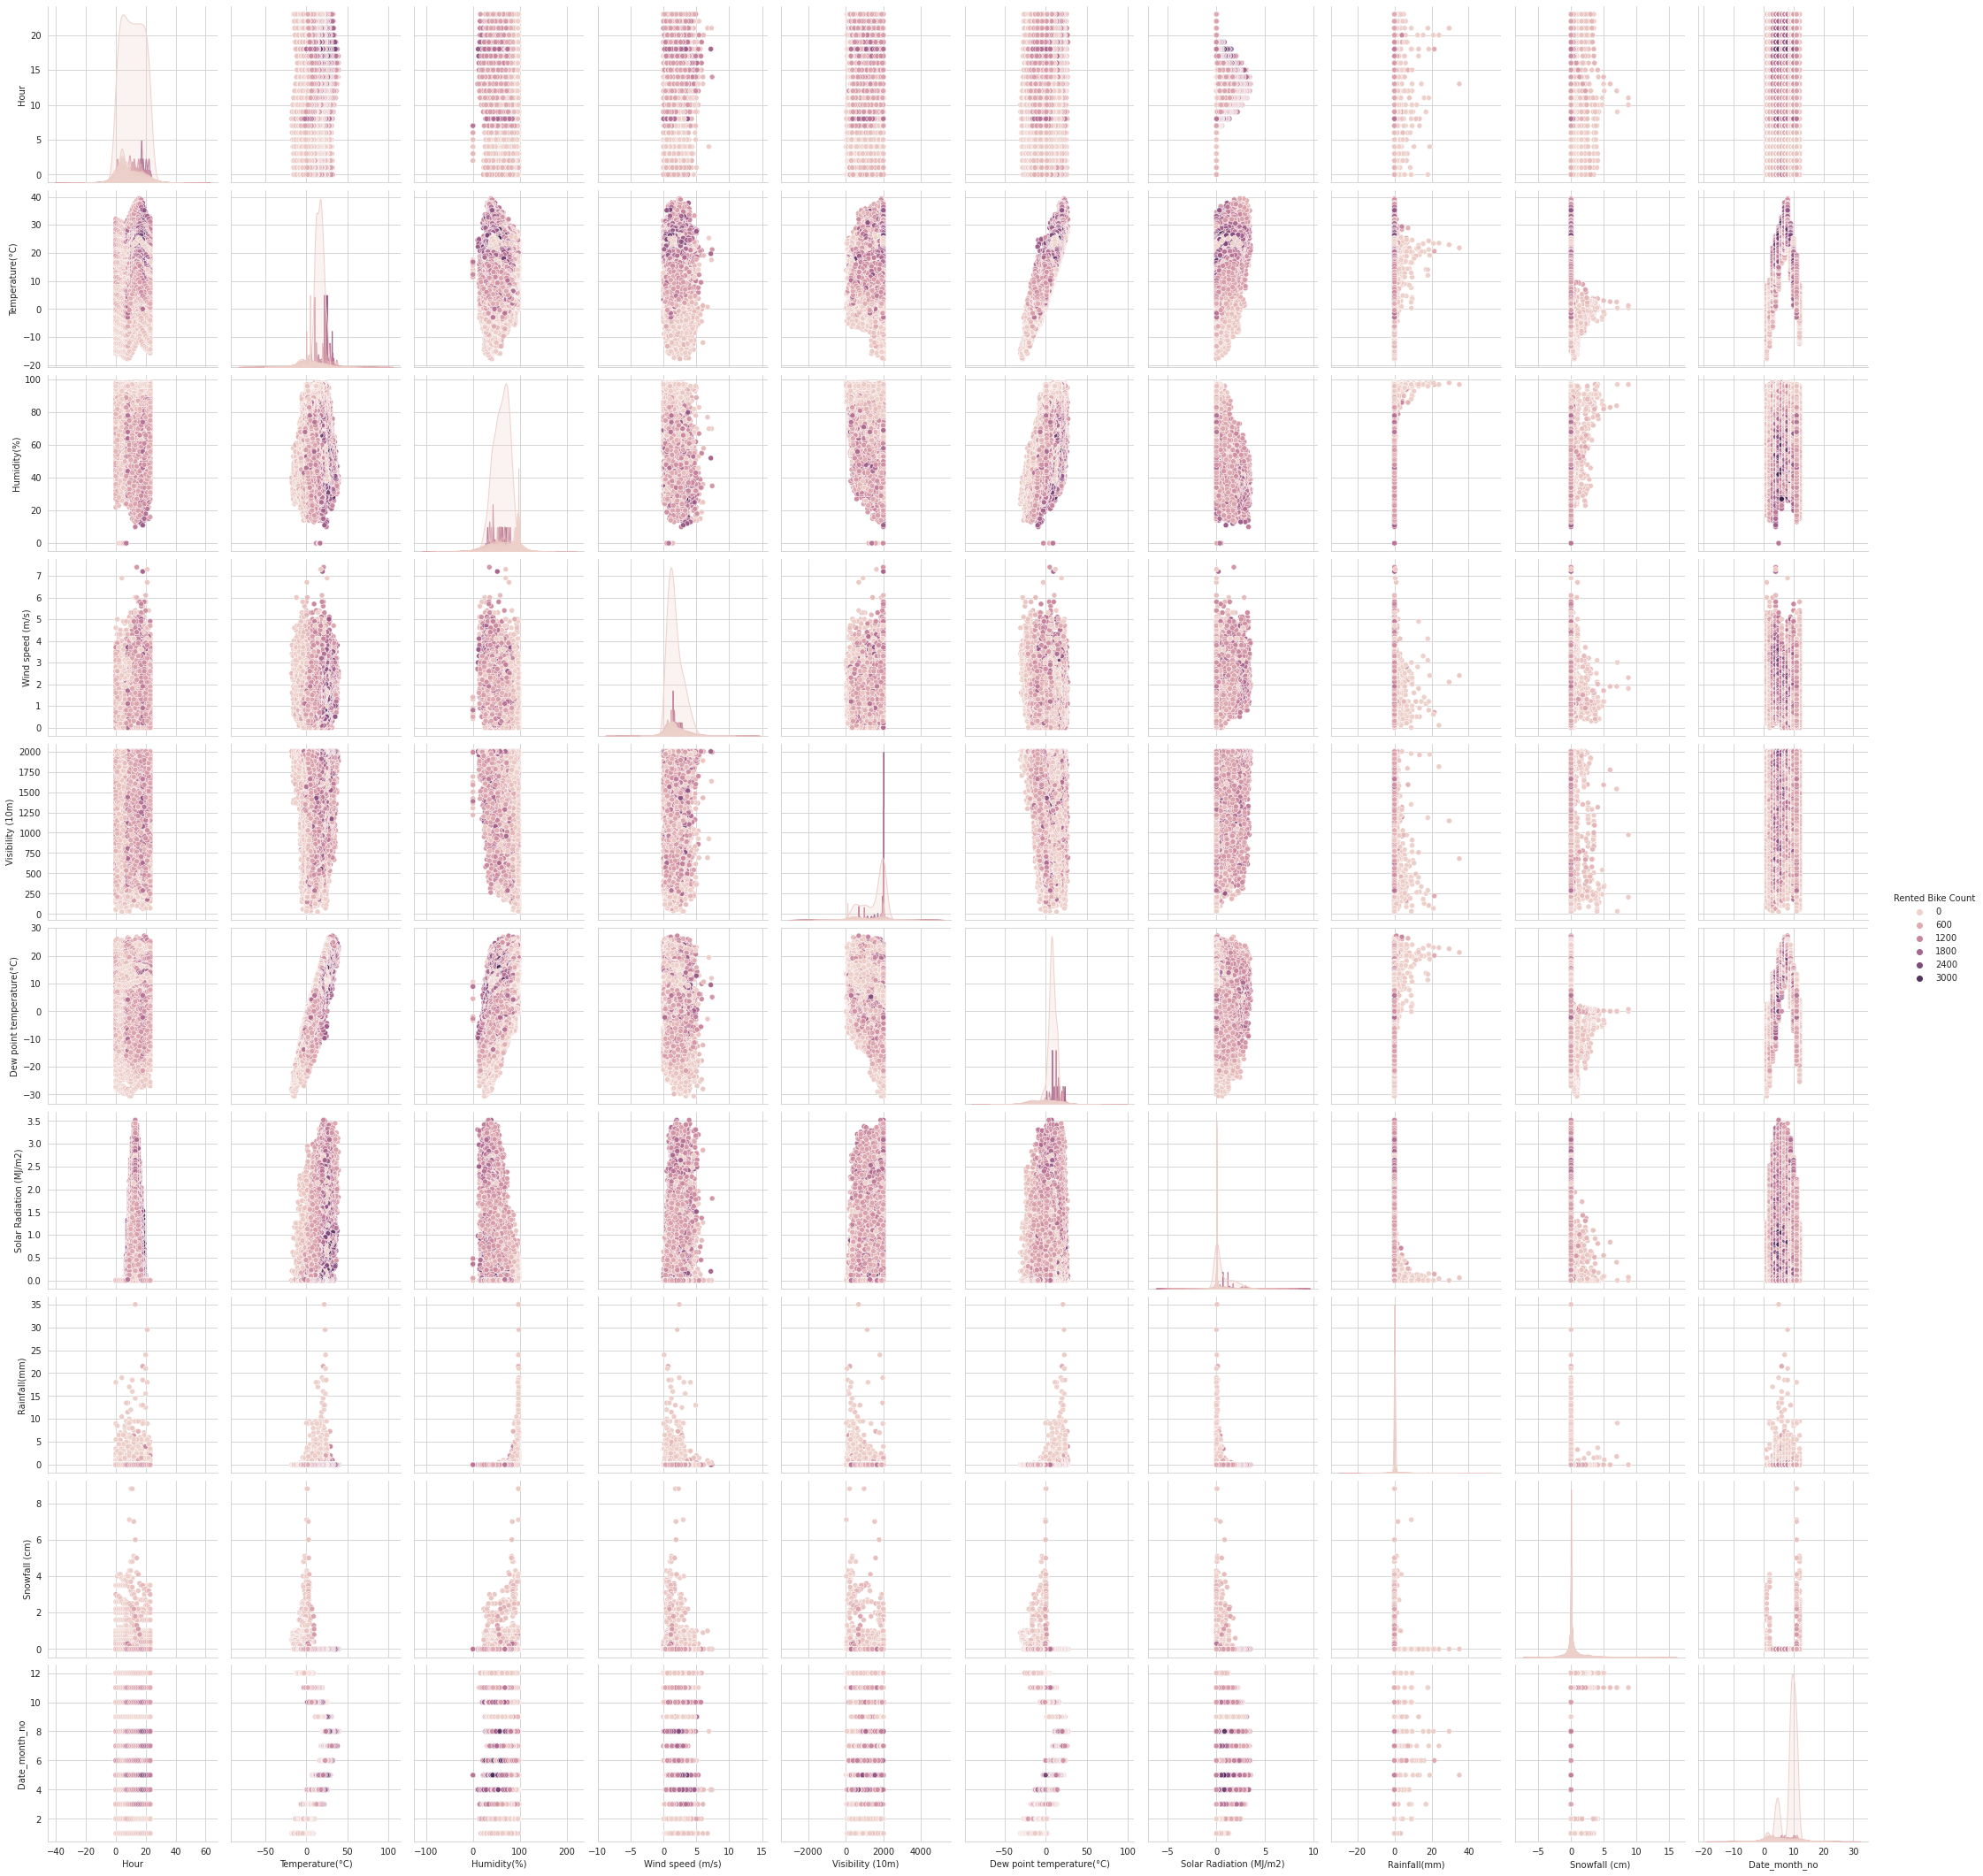

In [ ]:
# pair plot implemented for dataset
sns.set_style("whitegrid");
sns.pairplot(data, hue="Rented Bike Count", size=3);
plt.show()

### **Feature incoding And creation**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

**Incoding on Date Column**

In [ ]:
# converting date column dtype object to date 
data['Date']=pd.to_datetime(data['Date'])


# split day of week, month and year in three column
data['day_of_week'] = data['Date'].dt.day_name() # extract week name from Date column
data["month"] = data['Date'].dt.month_name()   # extract month name from Date column
data["year"] = data['Date'].map(lambda x: x.year).astype("object")     # extract year from Date column and convert it in object type 

# drop the Date column
data.drop(columns=['Date','Date_month_no'],inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   object 
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  month                      8760 non-null   objec

**Creating New feature Week day and weekend**

In [ ]:
# Converting days of weeks in Two variable from Monaday to Friday in Weekdays and Saturday and Sunday to Weekend
data['week'] = data['day_of_week'].apply(lambda x:'Weekend'  if x=='Saturday' or  x== 'Sunday' else 'Weekdays')

Text(0.5, 1.0, 'Rented Bike Count during weekday and weekend with respect of Hour')

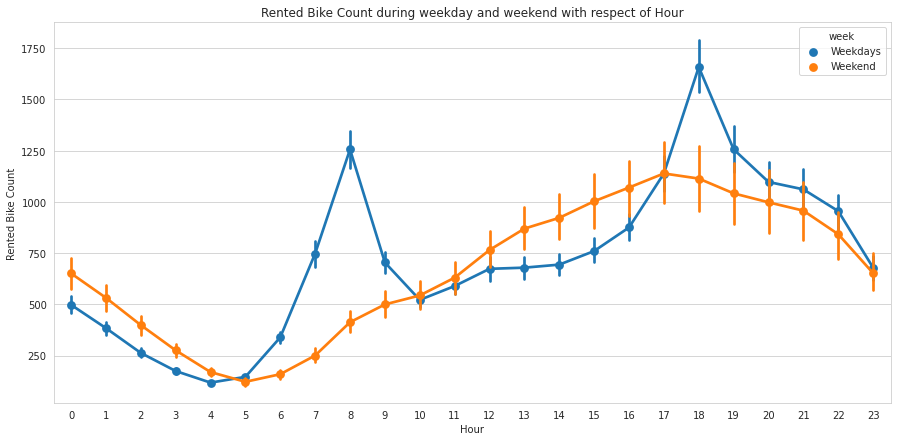

In [ ]:
# Getting feel of week column with pointplot  
plt.figure(figsize=(15,7))
sns.pointplot(x=data["Hour"],y=data['Rented Bike Count'],hue=data['week'])
plt.title("Rented Bike Count during weekday and weekend with respect of Hour")

In [ ]:
# droping the days of week column from df and from categorical feature 
data.drop(columns=['day_of_week'], inplace=True)

**Lets do some feature engineering on Hour column**

In [ ]:
# defining a function for distribute hour column
def hour(h):
  if h >= 17 and h <= 22:
    return 'Evening'
  elif h >= 7 and h <= 10:
    return 'Morning'
  elif h >= 11 and h <= 16:
    return 'Noon'
  else :
    return 'Night'  

In [ ]:
# apply the hour function
data['Hour'] = data['Hour'].apply(hour)

# value count of Hour 
data['Hour'].value_counts()

Night      2920
Noon       2190
Evening    2190
Morning    1460
Name: Hour, dtype: int64

### **Features Selections**

In [ ]:
# fist we are going to split train and test for avoiding overfitting problam.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop(['Rented Bike Count'], axis=1),
                                                    data['Rented Bike Count'],
                                                    test_size=0.2,
                                                    random_state=0)

data.shape,x_train.shape, x_test.shape

((8760, 16), (7008, 15), (1752, 15))

#### **Correlation**

In [ ]:
# Check the correlation on data set
x_train.corr()

Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
Temperature(°C)                   1.000000     0.154051         -0.032333   
Humidity(%)                       0.154051     1.000000         -0.344004   
Wind speed (m/s)                 -0.032333    -0.344004          1.000000   
Visibility (10m)                  0.036242    -0.547715          0.176518   
Dew point temperature(°C)         0.912724     0.532832         -0.175369   
Solar Radiation (MJ/m2)           0.363076    -0.457705          0.332530   
Rainfall(mm)                      0.047771     0.229661         -0.020668   
Snowfall (cm)                    -0.218641     0.110899         -0.003987   

                           Visibility (10m)  Dew point temperature(°C)  \
Temperature(°C)                    0.036242                   0.912724   
Humidity(%)                       -0.547715                   0.532832   
Wind speed (m/s)                   0.176518                  -0.175369   
Visibility (10m)                   1.000000                  -0.176538   
Dew point temperature(°C)         -0.176538                   1.000000   
Solar Radiation (MJ/m2)            0.145275                   0.105797   
Rainfall(mm)                      -0.159169                   0.121061   
Snowfall (cm)                     -0.117943                  -0.150324   

                           Solar Radiation (MJ/m2)  Rainfall(mm)  \
Temperature(°C)                           0.363076      0.047771   
Humidity(%)                              -0.457705      0.229661   
Wind speed (m/s)                          0.332530     -0.020668   
Visibility (10m)                          0.145275     -0.159169   
Dew point temperature(°C)                 0.105797      0.121061   
Solar Radiation (MJ/m2)                   1.000000     -0.071988   
Rainfall(mm)                             -0.071988      1.000000   
Snowfall (cm)                            -0.074051     -0.005397   

                           Snowfall (cm)  
Temperature(°C)                -0.218641  
Humidity(%)                     0.110899  
Wind speed (m/s)               -0.003987  
Visibility (10m)               -0.117943  
Dew point temperature(°C)      -0.150324  
Solar Radiation (MJ/m2)        -0.074051  
Rainfall(mm)                   -0.005397  
Snowfall (cm)                   1.000000

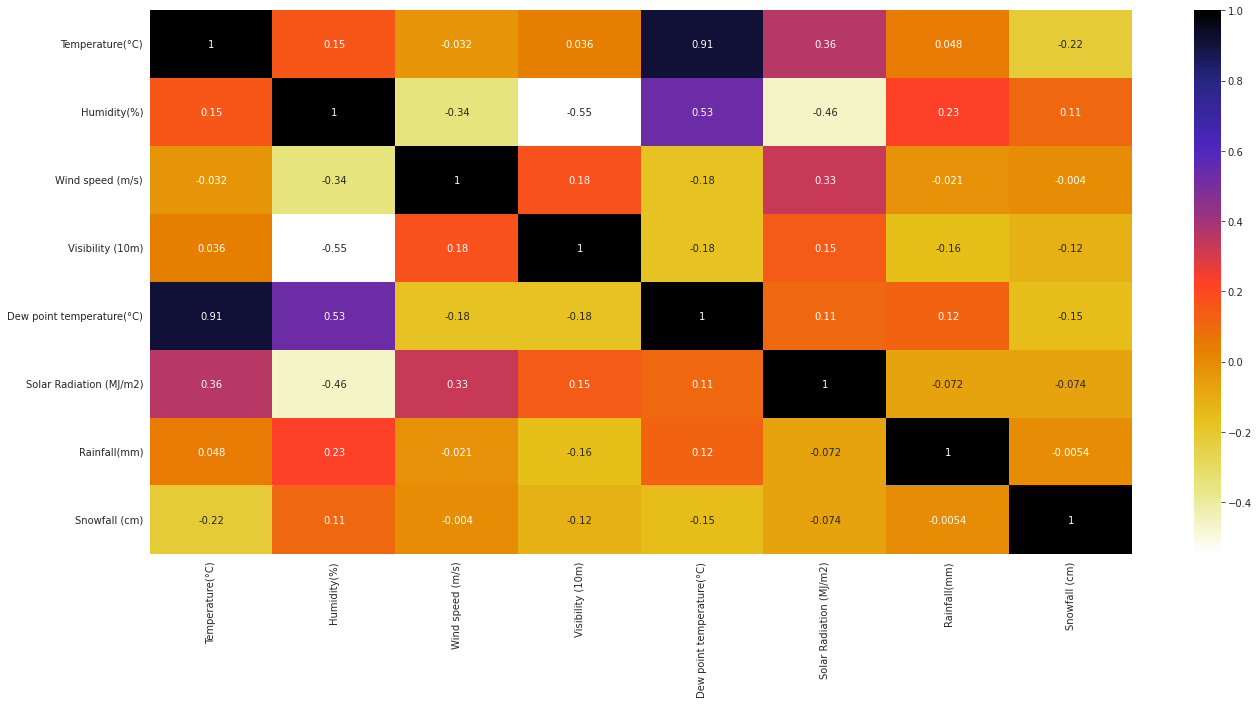

In [ ]:
# Check the correlation using heatmap on data set
import seaborn as sns

#Using Pearson Correlation
plt.figure(figsize=(22,10))
cor = x_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
# Checking highlly correlation on train data
corr_features = correlation(x_train, 0.9)
len(set(corr_features))

1

* Conclusion is that after using correlation plot we find **"Dew point temperature(°C)"** variable is higlly correlated


---



#### **Checking for Variacian Inflation(VIF)**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a function for checking Checking for variacian inflation
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
# variacian inflation all columns with Rented Bike Count
calc_vif(data[[i for i in data.describe().columns if i not in ['Rented Bike Count']]])


variables        VIF
0            Temperature(°C)  29.075866
1                Humidity(%)   5.069743
2           Wind speed (m/s)   4.517664
3           Visibility (10m)   9.051931
4  Dew point temperature(°C)  15.201989
5    Solar Radiation (MJ/m2)   2.821604
6               Rainfall(mm)   1.079919
7              Snowfall (cm)   1.118903

In [ ]:
calc_vif(data[[i for i in data.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

variables       VIF
0          Temperature(°C)  3.166007
1              Humidity(%)  4.758651
2         Wind speed (m/s)  4.079926
3         Visibility (10m)  4.409448
4  Solar Radiation (MJ/m2)  2.246238
5             Rainfall(mm)  1.078501
6            Snowfall (cm)  1.118901

*  Using correlation plot we find **"Dew point temperature(°C)"** variable is higlly correlated.

* So according to VIF there is '**Dew point temperature(°C)'** is **multicollinearity**.

## **Data Pre-processing**

### **Feature Scaling**

In [ ]:
new_df=pd.get_dummies(data,drop_first=True,sparse=True)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype           
---  ------                     --------------  -----           
 0   Rented Bike Count          8760 non-null   int64           
 1   Temperature(°C)            8760 non-null   float64         
 2   Humidity(%)                8760 non-null   int64           
 3   Wind speed (m/s)           8760 non-null   float64         
 4   Visibility (10m)           8760 non-null   int64           
 5   Dew point temperature(°C)  8760 non-null   float64         
 6   Solar Radiation (MJ/m2)    8760 non-null   float64         
 7   Rainfall(mm)               8760 non-null   float64         
 8   Snowfall (cm)              8760 non-null   float64         
 9   Hour_Morning               8760 non-null   Sparse[uint8, 0]
 10  Hour_Night                 8760 non-null   Sparse[uint8, 0]
 11  Hour_Noon                  8760 non-null   

In [ ]:
X = new_df.drop(columns=['Rented Bike Count','Dew point temperature(°C)'])
y = np.sqrt(new_df['Rented Bike Count'])

In [ ]:
# Train test split our data
x_train1,x_test1,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=42)

**transforming X_train and X_test with yeo-johnson transformation**

In [ ]:
from sklearn.preprocessing import PowerTransformer,MinMaxScaler
yeo = PowerTransformer()
x_train = yeo.fit_transform(x_train1) # fit transform the training set
x_test = yeo.transform(x_test1) #tranform the test set

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


## **Model Implementation** 

### **Import Dependancy**

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

**Create a function for scores**

In [ ]:
# Appending all models parameters to the corrosponding list
mean_absolut_error = []
mean_sq_error=[]
root_mean_sq_error=[]
training_score =[]
r2_list=[]
adj_r2_list=[]
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


def score_metrix (model,X_train,X_test,Y_train,Y_test):

  '''
    train the model and gives mae, mse,rmse,r2,adj r2 score of the model
    
  '''
  #training the model
  model.fit(X_train,Y_train)

  # Training Score
  training  = model.score(X_train,Y_train)
  print("Training score  =", training)

  try:
      # finding the best parameters of the model if any 
    print(f"The best parameters found out to be :{model.best_params_} \nwhere model best score is:  {model.best_score_} \n")
  except:
    pass
    

  #predicting the Test set and evaluting the models 

  if model == LinearRegression() or model == Lasso() or model == Ridge():
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test**2,Y_pred**2)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test**2,Y_pred**2)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score
    
    r2 = r2_score(Y_test**2,Y_pred**2)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test**2,Y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')
  
  else:
    # for tree base models
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test,Y_pred)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test,Y_pred)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score
    
    r2 = r2_score(Y_test,Y_pred)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test,Y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

    try:
      
      # ploting the graph of feature importance
      
      best = model.best_estimator_
      features = X_train.columns
      importances = best.feature_importances_
      indices = np.argsort(importances)
      plt.figure(figsize=(10,15))
      plt.title('Feature Importance')
      plt.barh(range(len(indices)), importances[indices], color='red', align='center')
      plt.yticks(range(len(indices)), [features[i] for i in indices])
      plt.xlabel('Relative Importance')
      plt.show()
    
    except:
      pass
  
  # Here we appending the parameters for all models 
  mean_absolut_error.append(MAE)
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  training_score.append(training)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)

  print('*'*80)
  # print the cofficient and intercept of which model have these parameters and else we just pass them
  try :
    print("coefficient \n",model.coef_)
    print('\n')
    print("Intercept  = " ,model.intercept_)
  except:
    pass
  print('\n')
  print('*'*20, 'ploting the graph of Actual and predicted only with 80 observation', '*'*20)

  # ploting the graph of Actual and predicted only with 80 observation for better visualisation which model have these parameters and else we just pass them
  try:
    # ploting the line graph of actual and predicted values  
    plt.figure(figsize=(15,7))
    plt.plot((Y_pred)[:80])
    plt.plot((np.array(Y_test)[:80]))
    plt.legend(["Predicted","Actual"])
    plt.show()
  except:
    pass

### **Linear Regression**

Training score  = 0.7528304949472668
MAE : 4.840998284567279
MSE : 38.178135932975174
RMSE : 6.178845841496224
R2 : 0.7477419157511107
Adjusted R2 :  0.7444734167418701 

********************************************************************************
coefficient 
 [ 5.95508209 -1.62770952  0.2515433   0.5636376   0.72879401 -3.06033017
  0.07512372 -1.90288105 -5.19005316 -3.693359   -0.10264436 -0.29086177
 -0.99552432  0.67296183  5.36751057 -1.12073129 -0.06739495 -0.86094349
 -0.64704363 -0.42827696  1.11789926 -0.52207466  0.54913309  0.70144529
  1.10463537  0.32806082  0.06739495 -0.62810677]


Intercept  =  23.442819487037085


******************** ploting the graph of Actual and predicted only with 80 observation ********************


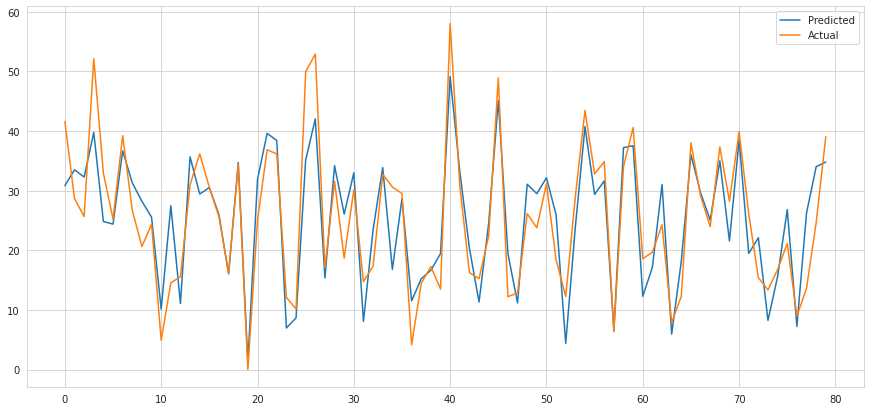

In [ ]:
# importing Fitting the linear regression model with our score matrix function 
score_metrix(LinearRegression(),x_train,x_test,y_train,y_test)

### **Lasso with hyperparameter tuning**

In [ ]:
L1 = Lasso() #creating variable
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]} #lasso parameters 
lasso_cv = GridSearchCV(L1, parameters, cv=5) #using gridsearchcv and cross validate the model

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.533e+08, tolerance: 2.190e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.695e+08, tolerance: 2.193e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

Training score  = 0.6678583813588055
The best parameters found out to be :{'alpha': 0.1} 
where model best score is:  0.6646151967709699 

MAE : 288.42283200724046
MSE : 139963.04930370126
RMSE : 374.11635797396144
R2 : 0.6579601343787619
Adjusted R2 :  0.6533679324792174 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


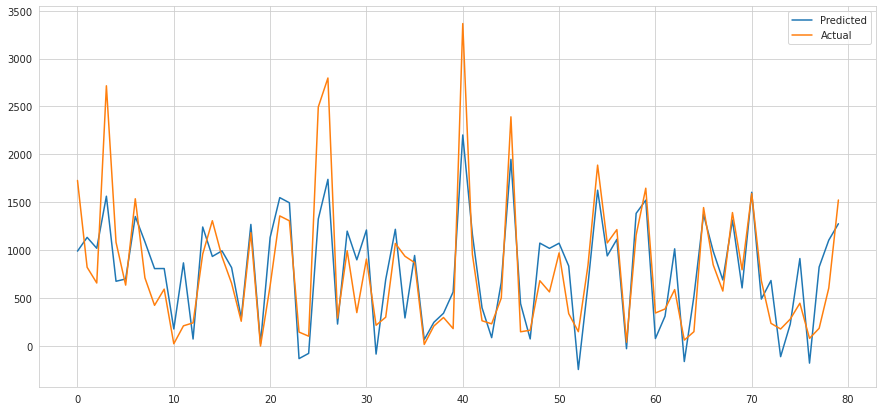

In [ ]:
# fit and evaluate model with score_matrix function
score_metrix(lasso_cv,x_train,x_test,y_train,y_test)

### **Ridge with hyperparameter tuning**

Training score  = 0.6678634241671104
The best parameters found out to be :{'alpha': 1e-10} 
where model best score is:  0.6646126456739175 

MAE : 288.53086657426815
MSE : 139972.21825994793
RMSE : 374.1286119236912
R2 : 0.6579377274036489
Adjusted R2 :  0.6533452246697163 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


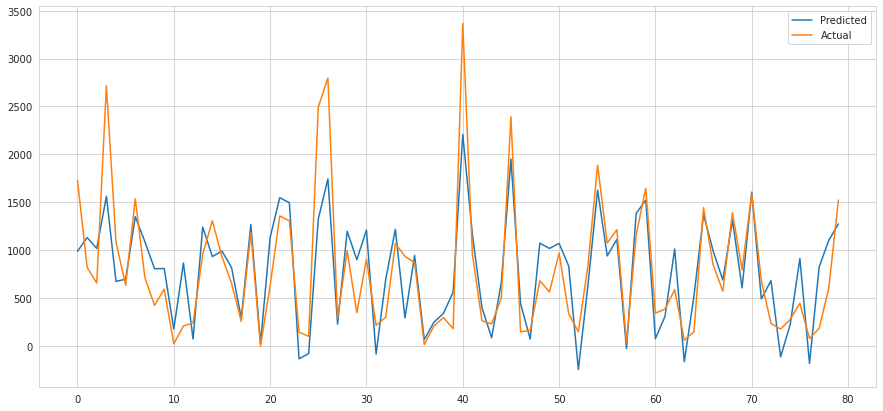

In [ ]:
L2 = Ridge() #creating variable
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]} # giving parameters 
L2_cv = GridSearchCV(L2, parameters, scoring='r2', cv=5) #using gridsearchcv and cross validate the model
score_metrix(L2_cv,x_train,x_test,y_train,y_test) # fit and evaluate model with score_matrix function

### **Polynomial**

In [ ]:
#creating variable with degree 2
poly = PolynomialFeatures(2) 

# fit the train set
poly_X_train = poly.fit_transform(x_train) 

#transform the test set
poly_X_test = poly.transform(x_test) 


#### **LinearRegression**

Training score  = 0.8432894626092357
MAE : 189.32785388127854
MSE : 75297.68476740867
RMSE : 274.4042360595198
R2 : 0.8159885047692103
Adjusted R2 :  0.7663566339558012 

********************************************************************************
coefficient 
 [ 3.37655368e+05  2.35766418e+02 -7.38730545e+01  1.08558374e+01
  1.97699184e+01 -1.05833569e+02 -4.22918746e+01 -1.71794070e+02
  2.05327906e+13  3.80383169e+12 -2.99740876e+13 -1.50898815e+13
 -1.95900715e+12  1.51823766e+13  6.18241034e+12  5.15214320e+13
  1.30285211e+14 -6.27081097e+12  1.37978084e+14  4.92669042e+13
  4.45591886e+13  1.76709147e+13 -1.18176817e+14  8.79397211e+13
 -2.84259664e+13  1.24898158e+13  5.51428049e+13  9.01200482e+13
 -1.03095363e+14 -2.57533435e+12  3.87282403e+02  2.52663947e+02
 -7.85246045e+01  6.09765625e+00 -7.00506348e+02 -1.01371094e+02
 -1.92037109e+02  4.46914062e+01 -9.43476562e+01 -1.90079834e+02
  9.83886719e+00  4.92038062e+12 -3.28050339e+11  5.22445713e+12
 -1.02732422e+02  1

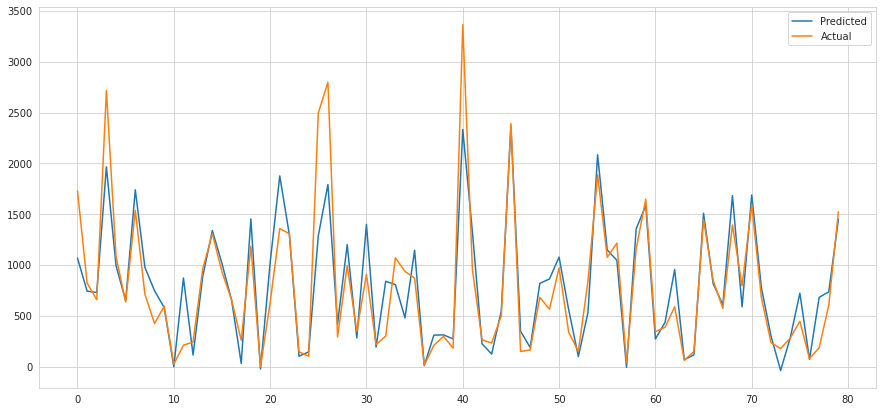

In [ ]:
# fit and evaluate model with score_matrix function
score_metrix(LinearRegression(), poly_X_train,poly_X_test,y_train,y_test)

### **Train Test split for Tree Base Models**
**because multicollinearty not effect tree base models**


In [ ]:
# Split data in X and Y
new_x = new_df.drop(columns='Rented Bike Count')
new_y = new_df['Rented Bike Count']

In [ ]:
# Train test split our data
x_train,x_test,y_train,y_test = train_test_split(new_x,new_y, test_size=0.25,random_state=42)

In [ ]:
# Scalling data with yeo-johnson
scaler = PowerTransformer()

In [ ]:
x_train  = scaler.fit_transform(x_train) #fitting the X_train
x_test  = scaler.transform(x_test) # transform test set

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


### **Decision Tree**

**Using Grid Search CV for hyperparameter tuning and try to find best parameters**

In [ ]:
# Parameters for Decission Tree model
param_grid = {'criterion' : ["mse"],
              'splitter' : ["best", "random"],
              'max_depth' : [10,15,20,'none'],
              'min_samples_split': [10,50,100],
              'max_features' :[24,35,40,49]}


In [ ]:
# Using Grid Search 
Dt_grid_search = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid,cv=2,n_jobs=-1)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
156 fits failed out of a total of 192.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 1320, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 308, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (

Training score  = 0.8478186221458872
The best parameters found out to be :{'criterion': 'mse', 'max_depth': 20, 'max_features': 24, 'min_samples_split': 50, 'splitter': 'random'} 
where model best score is:  0.786239297373156 

MAE : 183.90109847170407
MSE : 76546.48347197294
RMSE : 276.6703516316357
R2 : 0.8129367068609616
Adjusted R2 :  0.8104252089438171 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


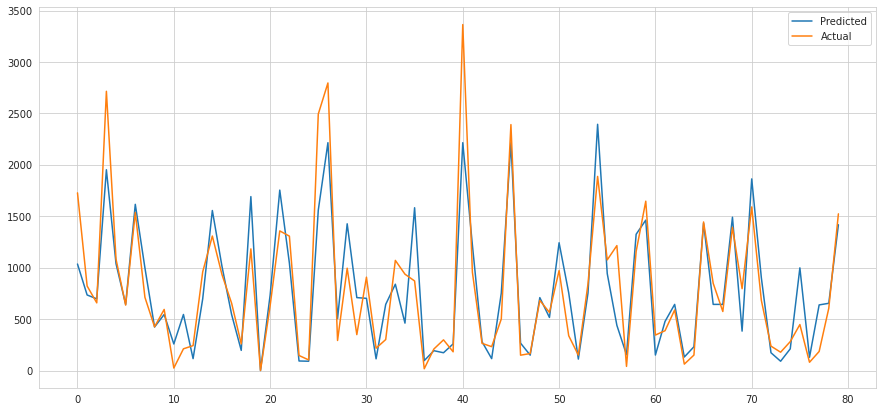

In [ ]:
# fit and evaluate model with score_matrix function
score_metrix(Dt_grid_search,x_train,x_test,y_train,y_test)

### **Using Random Forest Regressor**

In [ ]:
# parameters for Random forest
param_grid = {"n_estimators":[50,100,150],
              'max_depth' : [10,15,20,25,'none'],
              'min_samples_split': [10,50,100],
              'max_features' :[24,35,40,49]}

In [ ]:
# Using Grid SearchCV 
Ranom_forest_Grid_search = GridSearchCV(RandomForestRegressor(),param_grid=param_grid,n_jobs=-1,verbose=2)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
720 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/p

Training score  = 0.950891993015746
The best parameters found out to be :{'max_depth': 25, 'max_features': 24, 'min_samples_split': 10, 'n_estimators': 100} 
where model best score is:  0.8578967809102519 

MAE : 154.5156443974052
MSE : 56842.28265766534
RMSE : 238.41619629896232
R2 : 0.8610895745801808
Adjusted R2 :  0.8592245734981554 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


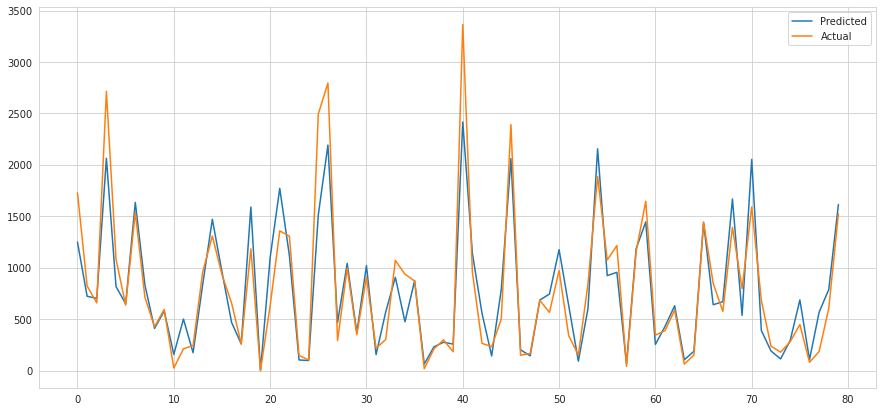

In [ ]:
# fit and evaluate model with score_matrix function
score_metrix(Ranom_forest_Grid_search,x_train,x_test,y_train,y_test)

### **Gradient Boosting Regressor**

In [ ]:
# parameters for Gradient Boosting Regressor
param_grid = {'learning_rate':[0.15,0.1,0.05,0.02,0.20],
              'n_estimators':[100,150,200,250],
              'max_depth':[2,4,6,10]}

In [ ]:

# Using grid search 
gradient_boost_grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid=param_grid, n_jobs=-1, verbose=2)

In [ ]:
# fit and evaluate model with score_matrix function
score_metrix(gradient_boost_grid_search,x_train,x_test,y_train,y_test)

### **Adaboost Boost Regressor**

In [ ]:
# parameters for Ada Boost Regressor
param_grid = {'n_estimators': [50,100,150,200],
          'learning_rate':[0.5,1,1.5,2],
          'base_estimator': [LinearRegression(),DecisionTreeRegressor()]}


In [ ]:
#creating Ada boost grid model
Ada_boost_grid_search = GridSearchCV(AdaBoostRegressor(),param_grid=param_grid,n_jobs=-1)

In [ ]:
# fit and evaluate model with score_matrix function
score_metrix(Ada_boost_grid_search,x_train,x_test,y_train,y_test)

### **XGBoost Regression**

In [ ]:
#importing XGBoost Regressor
params = {'learning_rate':[0.5,1,1.5,2],'n_estimators':[80,100,150],'max_depth':[15,20,30]}


In [ ]:
#creating xgb grid model
xgb_grid_search= GridSearchCV(XGBRegressor(),param_grid=params,)


In [ ]:
score_metrix(xgb_grid_search,x_train,x_test,y_train,y_test)

### **KNN Regressor**

Training score  = 0.8873684520023236
MAE : 182.88365296803656
MSE : 79982.99894063927
RMSE : 282.8126569668325
R2 : 0.8045385953954318
Adjusted R2 :  0.8019143450558335 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


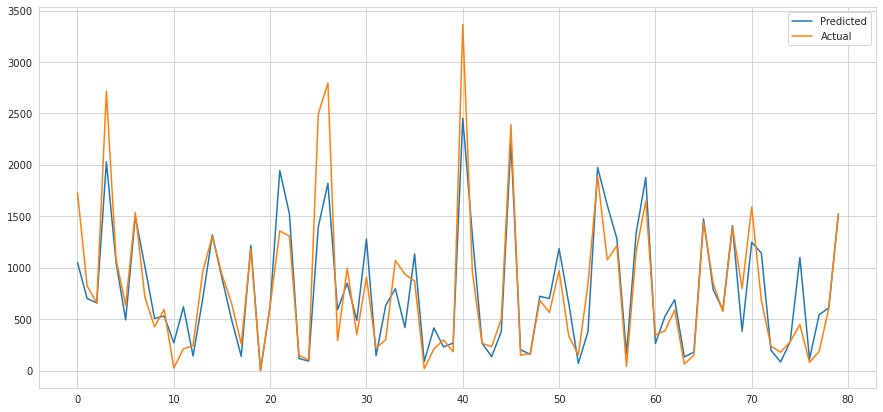

In [ ]:
# Using KNN Regression
knn = KNeighborsRegressor()

# Fitting Knn regressor
score_metrix(knn,x_train,x_test,y_train,y_test)

## **Creating Data Frame of all Evaluation Matrix with respect of models**

In [ ]:
#creating dictionary to store all the metrices 
all_matrices={'Mean_Absolute_error':mean_absolut_error,'Mean_square_error':mean_sq_error,'Root_Mean_square_error':root_mean_sq_error,'Training_score':training_score,'R2':r2_list,'Adjusted_R2':adj_r2_list}


In [ ]:
#list of all model name 
model_name=['Linear','Lasso','Ridge','Polynomial','Decision_Tree','Random_Forest','Gradient Boosting Regressor','Adaboost Boost Regressor','XGBoost Regression','KNN Regressor']


In [ ]:
#converting dictionary to dataframe fro easy visual
matrices_df=pd.DataFrame.from_dict(all_matrices,orient='index', columns=model_name)
matrices_df

ValueError: ignored

## **Model Explainability Using (LIME).**

In [ ]:
# first install the packages
!pip install shap
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import lime
from lime import lime_tabular
model = LinearRegression()
model.fit(x_train1,y_train)
# LIME has one explainer for all the models
explainer = lime.lime_tabular.LimeTabularExplainer(x_train1.values, feature_names=x_train1.columns.values.tolist(),
                                                  class_names=['Rented Bike Count'], verbose=True, mode='regression')

# Choose the 5th instance and use it to predict the results
j = 5
exp = explainer.explain_instance(x_test1.values[j], model.predict, num_features=6)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


Intercept -569.1535935017923
Prediction_local [800.62662286]
Right: 729.2159841529614


In [ ]:
# Show the predictions
exp.show_in_notebook(show_table=True)

#  **Conclusion from Model Training**

**Abut some Feature engineering**

* First we convert chatogorical values to num values.

* Converting date column dtype object to date.split **day of week**, **month** and **year** in three column

* Creating New feature **Week day** and **weekend**. And droping the days of week column from data and from categorical feature.

* Convert Hour column in three part Night, Noon, Evening, Morning For better predictation.

* Using correlation plot we find **"Dew point temperature(°C)"** variable is higlly correlated.

* Using VIF there is '**Dew point temperature(°C)'** is **multicollinearity**.So decide to drop Dew point temperature(°C).

**About models**

* Also using **Power Transformer** for scaling and transform it after train test split so we can aboide overfitting.

* Create a function for print the scores so we can use this function.

* Fist we use some **Linear Regression** and then use **Lasso** and **Ridge** with the help of **Hyperparameter Tuning**

* Using **PolynomialFeatures** with **Linear Regression**. but we did not get good scores.

* Then we use Tree Base Models because we know because **multicollinearty not** effect **tree base models**.So use we Random **Forest Regressor** and **Decision Tree**.

* Then we decide to use some boosting regression for better predictions. So we use **Gradient Boosting Regressor**, **Adaboost Boost Regressor**, **XGBoost Regression**. We got our best **rmse** score with Linear,	Lasso,	Ridge,	Polynomial. We got our best **Training_score** with Random_Forest. We got our best R2, Adjusted_R2 with Decision_Tree,	Random_Forest,	Bagging.
